# QUIZ 5 - Object Recognition: BoF vs ConvNetsTarefa

### Grupo: Luiz Gontijo, Marcos Vinicius, Matheus Pimenta

O objetivo deste Quiz é implementar e comparar duas maneiras de reconhecimento de objetos. 

In [12]:
import numpy as np
import pickle
import cv2 as cv
from matplotlib import pyplot as plt
import scipy.misc as smp
from sklearn.ensemble import RandomForestClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [2]:
def unpickle(file):
    with open(file, 'rb') as fo:
        dict = pickle.load(fo, encoding='bytes')
    return dict

In [3]:
batch1 = unpickle("./cifar-10-python/cifar-10-batches-py/data_batch_1")
# for key in batch1:
#     print(key, '->', batch1[key])



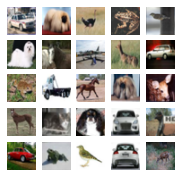

In [4]:
X = batch1[b"data"] 
Y = batch1[b'labels']
X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")

#Visualizing CIFAR 10
fig, axes1 = plt.subplots(5,5,figsize=(3,3))
for j in range(5):
    for k in range(5):
        i = np.random.choice(range(len(X)))
        axes1[j][k].set_axis_off()
        axes1[j][k].imshow(X[i:i+1][0])


### Bag of Features

1. Dataset aleatório
2. SIFT pra cada uma das imagens
3. Comparar descritores do SIFT e separar em grupos (clusters)
4. Criar um representante para cada grupo (média do grupo)
5. Classificar todas as imagens (data e label)
    data = [[1,2,3],[1,3,5],...] | label = [0,1,2,...]
6. Passar pros modelos de aprendizado


⚫ It is composed of 4 steps
    1. Feature Extraction
    2. Visual Dictionary Creation
    3. Vector Quantization
    4. Image Representation

In [5]:
def get_SIFT_desc(img):
    sift = cv.SIFT_create()
    k, d = sift.detectAndCompute(img, None)
    return k, d

In [6]:

def get_random_img(dataset):
    X = dataset[b"data"]
    Y = dataset[b"labels"]
    X = X.reshape(10000, 3, 32, 32).transpose(0,2,3,1).astype("uint8")
    i = np.random.choice(range(len(X)))
    return X[i:i+1][0], Y[i]

In [7]:
def get_descriptors_n_imgs(dataset, n):
    descs = []
    for i in range(n):
        img, _ = get_random_img(dataset)
        _, desc_array = get_SIFT_desc(img)

        if desc_array is not None:
            for elem in desc_array:
                descs.append(elem)

    descs = np.array(descs)
    return descs


def create_clusters(descs, k, attempts):
    criteria = (cv.TERM_CRITERIA_EPS + cv.TERM_CRITERIA_MAX_ITER, 10, 1.0)
    _,_,center = cv.kmeans(descs,k,None,criteria,attempts,cv.KMEANS_RANDOM_CENTERS)
    return center

In [8]:
def generate_hist(img, vocab):
    k, d = get_SIFT_desc(img)
    # n1 = d[0]
    # n2 = vocab[0]
    # diff = sum( np.sqrt ([x**2 for x in n1] - [x**2 for x in n2]))
    histograma = []
    for word in vocab:
        aux = 0
        if d is not None:
            for elem in d:
                foo = [x**2 for x in elem]
                bar = [x**2 for x in word]
                # print(np.sqrt ( [np.abs(x1 - x2) for (x1, x2) in zip(foo, bar)]))
                luiz = sum ( np.sqrt ( [np.abs(x1 - x2) for (x1, x2) in zip(foo, bar)]))
                if( luiz <= 4200.0 ): #32.8125
                    aux = aux + 1
        
        histograma.append(aux)

                
    return histograma

In [9]:
def get_train_set(dataset, vocab, n_samples):
    X = []
    Y = []
    for i in range(n_samples):
        img, y = get_random_img(dataset)
        Y.append(y)
        # d = get_SIFT_desc(img)
        X.append(generate_hist(img,vocab))

    return X, Y

In [68]:
# TESTES
# img = get_random_img(batch1)
# k, d = get_SIFT_desc(img)
# copy = img.copy()
# copy = cv.drawKeypoints(img,k,copy,flags=cv.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS)
# plt.imshow(copy)
# plt.show()
N_IMAGES = 1000
N_SAMPLES = 1000
K_CLUSTERS = 200
K_ATTEMPTS = 10
descs = get_descriptors_n_imgs(batch1, N_IMAGES)
centers = create_clusters(descs, K_CLUSTERS, K_ATTEMPTS)
# print(centers)
X,Y = get_train_set(batch1, centers, N_SAMPLES)
print(len(X))
print(len(Y))

clf = RandomForestClassifier()
clf.fit(X, Y)


1000
1000


RandomForestClassifier()

In [76]:
img, y = get_random_img(batch1)
h = generate_hist(img, centers)
h = np.reshape(h,(1, -1))
print(clf.predict(h))
print(y)

[9]
7


In [ ]:
neural_net = MLPClassifier()
neural_net(X, Y)

In [ ]:
img, y = get_random_img(batch1)
h = generate_hist(img, centers)
h = np.reshape(h,(1, -1))
print(clf.predict(h))
print(y)

In [ ]:
# View accuracy score
accuracy_score(y_test, y_pred_test)

# View confusion matrix for test data and predictions
confusion_matrix(y_test, y_pred_test)